In [1]:
#upload google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pip install nltk

In [3]:
# pip install spacy

In [4]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
import csv
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize   #Seperate between words
from nltk.corpus import stopwords

In [5]:
raw_mail_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/dataset/SpamOrHam/mail_data.csv")

In [6]:
#Check if there is null or not
raw_mail_data.isnull().value_counts()

Category  Message
False     False      5572
dtype: int64

In [7]:
# replace the null values with a null string
# mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')
# mail_data.head(5)


In [8]:
raw_mail_data.shape

(5572, 2)

In [9]:
raw_mail_data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
raw_mail_data.Category.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

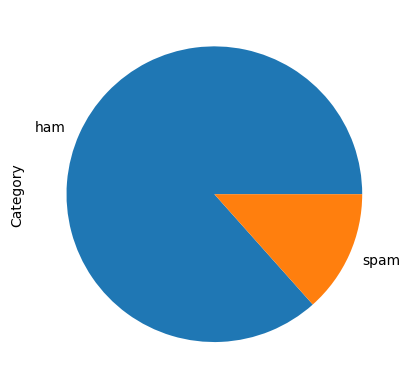

In [11]:
raw_mail_data.Category.value_counts(normalize=True).plot.pie()
plt.show()

In [12]:
# label spam mail as 0;  ham mail as 1;
raw_mail_data.loc[raw_mail_data['Category'] == 'spam', 'Category',] = 0
raw_mail_data.loc[raw_mail_data['Category'] == 'ham', 'Category',] = 1

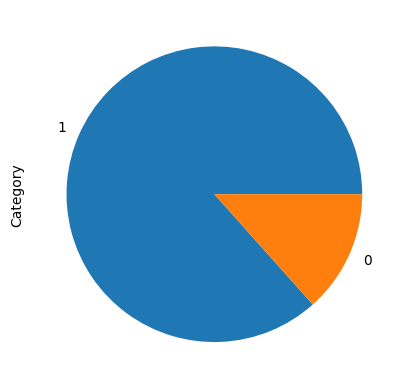

In [13]:
raw_mail_data.Category.value_counts(normalize=True).plot.pie()
plt.show()

In [14]:
mail_data=raw_mail_data.copy()

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

mail_data['Message_Nopunc'] = mail_data['Message'].apply(lambda x: remove_punct(x))

mail_data.head()

,Category,Message,Message_Nopunc
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [18]:
def lowercase(text):

    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

mail_data['Message_Lower_Case'] = mail_data['Message_Nopunc'].apply(lambda x: lowercase(x.lower()))

In [19]:
mail_data.head()

,Category,Message,Message_Nopunc,Message_Lower_Case
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
mail_data['Message_tokenized'] = mail_data['Message_Lower_Case'].apply(lambda x: tokenize(x))

mail_data.head()

,Category,Message,Message_Nopunc,Message_Lower_Case,Message_tokenized
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [22]:
nltk.download('stopwords')
stopwords_En = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

mail_data['Message_No_stopwords'] = mail_data['Message_tokenized'].apply(lambda x: remove_stopwords(x))

mail_data.head()

,Category,Message,Message_Nopunc,Message_Lower_Case,Message_tokenized,Message_No_stopwords
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [24]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

mail_data['After_stemm'] = mail_data['Message_No_stopwords'].apply(lambda x: stemming(x))

mail_data.head()

,Category,Message,Message_Nopunc,Message_Lower_Case,Message_tokenized,Message_No_stopwords,After_stemm
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [25]:
last_data = mail_data.drop(columns={"Message","Message_Nopunc","Message_Lower_Case",
                                    "Message_tokenized",'Message_No_stopwords'})
last_data.head()

,Category,After_stemm
0,1,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,1,"[ok, lar, joke, wif, u, oni]"
2,0,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,1,"[nah, dont, think, goe, usf, live, around, tho..."


In [26]:
def listToString(text):
    empty_text = ""
    for i in text:
      empty_text = empty_text+ " " + i
    return empty_text

last_data['last_message'] = last_data['After_stemm'].apply(lambda x: listToString(x))

last_data.head()

,Category,After_stemm,last_message
0,1,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great worl...
1,1,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,0,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 2...
3,1,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,1,"[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


In [27]:
# separating the data as texts and label

X = last_data['last_message']

Y = last_data['Category']


In [28]:
print(X)

0        go jurong point crazi avail bugi n great worl...
1                                   ok lar joke wif u oni
2        free entri 2 wkli comp win fa cup final tkt 2...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567     2nd time tri 2 contact u u £750 pound prize 2...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570     guy bitch act like id interest buy someth els...
5571                                       rofl true name
Name: last_message, Length: 5572, dtype: object


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [30]:
print("total data size of X= ",X.shape)        #total
print("train data size of X= ",X_train.shape)  #module training
print("test data size  of X= ",X_test.shape)   #testing

total data size of X=  (5572,)
train data size of X=  (4457,)
test data size  of X=  (1115,)


In [31]:
print("total data size of Y= ",Y.shape)        #total
print("train data size of Y= ",Y_train.shape)  #module training
print("test data size  of Y= ",Y_test.shape)   #testing

total data size of Y=  (5572,)
train data size of Y=  (4457,)
test data size  of Y=  (1115,)


In [32]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [33]:
model = LogisticRegression()

In [36]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [37]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [38]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9632039488445142


In [39]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [40]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


In [59]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

Result='';
if (prediction[0]==1):
  Result="Ham"
  print('Ham mail')

else:
  Result="Spam"
  print('Spam mail')

[1]
Ham mail


In [63]:
input_mail = ["Disguised as internal company communications, these emails might claim to be gathering employee feedback or verifying details for payroll, tricking employees into divulging personal or company information."]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

Result='';
if (prediction[0]==1):
  Result="Ham"
  print('Ham mail')

else:
  Result="Spam"
  print('Spam mail')

[0]
Spam mail


#From outer data set#

In [66]:
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

Result='';
if (prediction[0]==1):
  Result="Ham"
  print('Ham mail')

else:
  Result="Spam"
  print('Spam mail')

[0]
Spam mail


# IOT Part

In [45]:
pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62118 sha256=42a6d319b437817cf4477bba3b26ccc5707f26452cbdc8d02fef1494a209b9ab
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


In [46]:
import paho.mqtt.client as mqtt
import time

In [47]:
# Callback function to handle connection established event
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    # Subscribe to a topic upon successful connection
    client.subscribe("spam_ham")

# Callback function to handle received messages
def on_message(client, userdata, msg):
    print("Received message: " + msg.payload.decode())

# Create an MQTT client instance
client = mqtt.Client()

# Set the callback functions
client.on_connect = on_connect
client.on_message = on_message

In [55]:
# Connect to the MQTT broker
client.connect("mqtt-dashboard.com", 1883, 60)


0

In [52]:
client.loop_start()


3

In [67]:
# Publish a message to a topic
client.publish("spam_ham", Result)